# Import packages and data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import datetime
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import seaborn as sns
plt.style.use('ggplot')
import calendar

In [2]:
d1 = pd.read_csv("../input/cyclistic-bikeshare/2020.04.csv")
d2 = pd.read_csv("../input/cyclistic-bikeshare/2020.05.csv")
d3 = pd.read_csv("../input/cyclistic-bikeshare/2020.06.csv")
d4 = pd.read_csv("../input/cyclistic-bikeshare/2020.07.csv")
d5 = pd.read_csv("../input/cyclistic-bikeshare/2020.08.csv")
d6 = pd.read_csv("../input/cyclistic-bikeshare/2020.09.csv")
d7 = pd.read_csv("../input/cyclistic-bikeshare/2020.10.csv")
d8 = pd.read_csv("../input/cyclistic-bikeshare/2020.11.csv")
d9 = pd.read_csv("../input/cyclistic-bikeshare/2020.12.csv")
d10 = pd.read_csv("../input/cyclistic-bikeshare/2021.01.csv")
d11 = pd.read_csv("../input/cyclistic-bikeshare/2021.02.csv")
d12 = pd.read_csv("../input/cyclistic-bikeshare/2021.03.csv")

In [3]:
df = pd.concat(objs= [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12])
df.reset_index(inplace = True, drop = True)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


# Check and change data types

In [4]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
#change started_at and ended_at to datetime

df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Creating new variable/s

In [6]:
#creating duration of ride

df["ride_duration"] = df["ended_at"] - df["started_at"]


#convert to minutes

df["ride_duration"] = df["ride_duration"].dt.total_seconds()
df["ride_duration"] = (df["ride_duration"]/60).round(2)


#rename

df.rename(columns = {"ride_duration":"ride_duration_min"}, inplace= True)

In [7]:
#creating hour of ride

df["hour"] = df["started_at"].dt.hour

In [8]:
#creating day of ride(week)

df["day"] = df["started_at"].dt.day_name()

In [9]:
#creating month of ride

df["month"] = df["started_at"].dt.month.apply(lambda x: calendar.month_name[x])
df["month"] = df["month"].apply(lambda x: x[:3])

# Check for missing data, outliers, cleaning data

### Missing data

In [10]:
df.isnull()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min,hour,day,month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489743,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3489744,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3489745,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3489746,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
ride_duration_min     False
hour                  False
day                   False
month                 False
dtype: bool

In [12]:
df.isnull().any().any()

True

In [13]:
df[df.isnull().any(axis= 1)]
# 195057 rows with na

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min,hour,day,month
1001,5E2BD03BCA180FBA,docked_bike,2020-04-07 11:53:08,2020-04-07 12:28:35,Wells St & Concord Ln,289,NaN,NaN,41.9121,-87.6347,NaN,NaN,member,35.45,11,Tuesday,Apr
1864,BD5813A6101E9BF4,docked_bike,2020-04-20 12:24:48,2020-04-20 12:29:46,Racine Ave & Wrightwood Ave,343,NaN,NaN,41.9289,-87.6590,NaN,NaN,member,4.97,12,Monday,Apr
2167,228691849C2081EE,docked_bike,2020-04-16 08:41:56,2020-04-16 11:33:48,Racine Ave & 18th St,15,NaN,NaN,41.8582,-87.6565,NaN,NaN,member,171.87,8,Thursday,Apr
2458,ED7750BCEEE87174,docked_bike,2020-04-09 15:33:45,2020-04-09 16:34:54,Morgan Ave & 14th Pl,137,NaN,NaN,41.8624,-87.6511,NaN,NaN,casual,61.15,15,Thursday,Apr
3834,1E00C457DCDA0835,docked_bike,2020-04-25 06:52:02,2020-04-25 07:17:54,Lake Shore Dr & Wellington Ave,157,NaN,NaN,41.9367,-87.6368,NaN,NaN,member,25.87,6,Saturday,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489734,FB44BC762D3FD957,electric_bike,2021-03-29 09:05:09,2021-03-29 09:11:52,NaN,NaN,New St & Illinois St,TA1306000013,41.8800,-87.6200,41.890230,-87.619377,member,6.72,9,Monday,Mar
3489735,CE2127F9F35C716A,electric_bike,2021-03-30 16:28:56,2021-03-30 16:41:31,NaN,NaN,New St & Illinois St,TA1306000013,41.8800,-87.6500,41.890313,-87.619472,member,12.58,16,Tuesday,Mar
3489737,705D00962C93B2BF,electric_bike,2021-03-19 18:52:21,2021-03-19 19:00:37,NaN,NaN,Clark St & Berwyn Ave,KA1504000146,41.9700,-87.6600,41.978036,-87.668121,member,8.27,18,Friday,Mar
3489738,566E15E846036648,electric_bike,2021-03-21 17:28:54,2021-03-21 17:36:18,NaN,NaN,Racine Ave & Congress Pkwy,TA1306000025,41.8800,-87.6500,41.874721,-87.657016,member,7.40,17,Sunday,Mar


In [14]:
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)

### Removing negative ride durations

[Text(0.5, 1.0, 'Boxplot of ride duration(min)')]

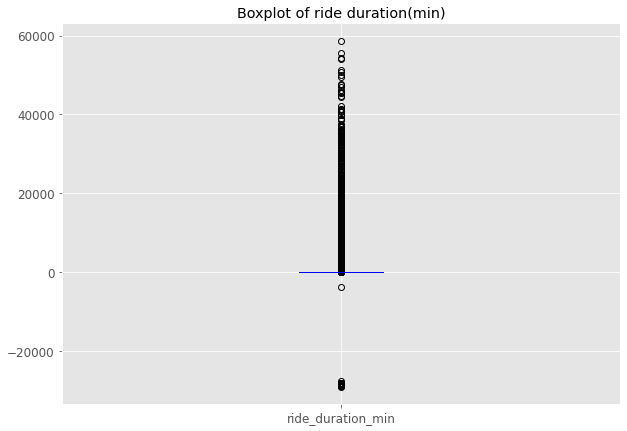

In [15]:
fig, ax = plt.subplots(figsize = (10,7))

pd.DataFrame(df["ride_duration_min"]).boxplot(fontsize = 12, color = "blue")

ax.set(title = "Boxplot of ride duration(min)")

In [16]:
df[df["ride_duration_min"]<0].index

Int64Index([   2419,    2500,    3132,    3538,    8203,    8554,   10604,
              18799,   19011,   19777,
            ...
            2959783, 2960067, 2960566, 2960677, 2961058, 2961299, 2961852,
            2962289, 3128311, 3202041],
           dtype='int64', length=10454)

In [17]:
df.drop(df[df["ride_duration_min"]<0].index, axis = 'index', inplace = True)
df.reset_index(inplace = True, drop = True)
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min,hour,day,month
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member,26.82,17,Sunday,Apr
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924400,-87.715400,41.930600,-87.723800,member,8.15,17,Friday,Apr
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.867900,-87.623000,member,14.38,17,Wednesday,Apr
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.899200,-87.672200,member,12.20,12,Tuesday,Apr
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.969500,-87.654700,casual,52.92,10,Saturday,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284232,081549DEA616CA22,electric_bike,2021-03-14 01:59:38,2021-03-14 03:13:09,Larrabee St & Armitage Ave,TA1309000006,New St & Illinois St,TA1306000013,41.918129,-87.643749,41.890808,-87.618779,member,73.52,1,Sunday,Mar
3284233,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual,143.85,14,Saturday,Mar
3284234,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,8.45,11,Tuesday,Mar
3284235,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member,41.58,11,Tuesday,Mar


### Removing positive outliers

In [18]:
scaler = StandardScaler()
scaler = scaler.fit(pd.DataFrame(df["ride_duration_min"]))
nor = scaler.transform(pd.DataFrame(df["ride_duration_min"]))
df1 = pd.DataFrame(nor)
df1.rename(columns={0:"std_duration"}, inplace=True)
df = pd.concat(objs=[df1, df], axis = 1)

In [19]:
df["std_duration"].min()

-0.108284404733629

In [20]:
df["std_duration"].max()

226.57994247849612

In [21]:
df[df["std_duration"]>3].index

Int64Index([     80,     214,     455,     745,    1490,    1516,    2066,
               2149,    2387,    2438,
            ...
            3277990, 3278655, 3279158, 3279192, 3280713, 3280717, 3281698,
            3281834, 3282021, 3283438],
           dtype='int64', length=4868)

In [22]:
df.drop(df[df["std_duration"]>3].index, axis = "index", inplace = True)
df.reset_index(inplace=True, drop = True)
df.head()

,std_duration,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min,hour,day,month
0,-0.004746,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,26.82,17,Sunday,Apr
1,-0.076821,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.15,17,Friday,Apr
2,-0.052771,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.38,17,Wednesday,Apr
3,-0.061186,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.20,12,Tuesday,Apr
4,0.096013,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,52.92,10,Saturday,Apr


In [23]:
df["std_duration"].min()

-0.108284404733629

In [24]:
df["std_duration"].max()

2.9999910146595905

# Check for duplicates

In [25]:
#check for ride_id duplicates

df[df.duplicated(["ride_id"], keep=False)]

,std_duration,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min,hour,day,month


In [26]:
df["ride_id"].duplicated(keep = False).any()

False

In [27]:
df.duplicated(keep = False).any()

False

# Data visualization and tables


''

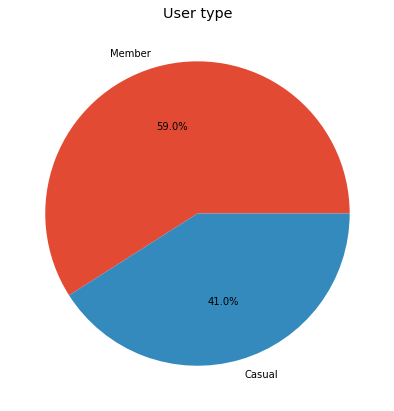

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.pie(df['member_casual'].value_counts(),
       labels = ["Member", "Casual"],
       autopct= '%1.1f%%')

ax.set(title = "User type")

;

### Visualization of total rides per start hour by user type

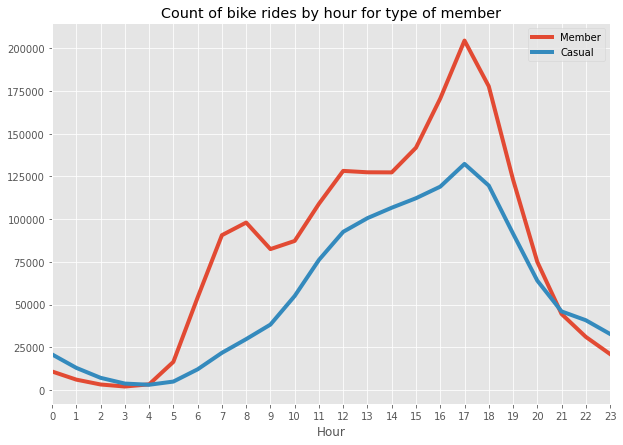

In [29]:
fig, ax = plt.subplots(figsize = (10,7))

df["hour"][df["member_casual"] == "member"].value_counts().sort_index().plot(linewidth = 4, label = "Member")
df["hour"][df["member_casual"] == "casual"].value_counts().sort_index().plot(linewidth = 4, label = "Casual")

ax.set(title = "Count of bike rides by hour for type of member", xlabel = "Hour")

ax.set_xlim(0,23)

plt.xticks(range(0,24))

plt.legend(loc = 'upper right');

### Visualization of rides by the day of week by user type


''

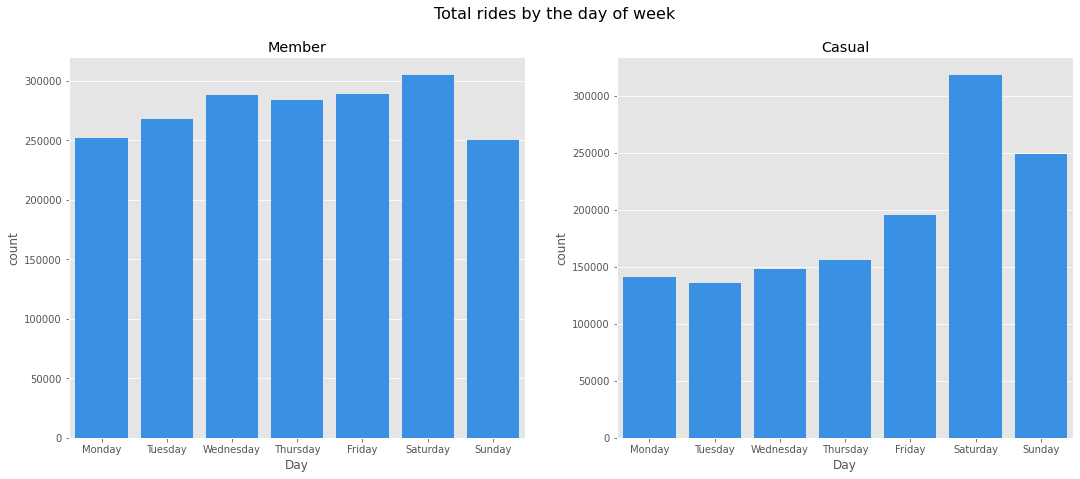

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

sns.countplot(x = df["day"][df["member_casual"] == "member"], 
              data = df, 
              order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
              ax = ax1, 
              color = "dodgerblue")



sns.countplot(x = df["day"][df["member_casual"] == "casual"], 
              data = df, 
              order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
              ax = ax2,
              color = "dodgerblue")

ax1.set(title = "Member", xlabel = "Day")
ax2.set(title = "Casual", xlabel = "Day")

plt.suptitle("Total rides by the day of week", fontsize=16)
;

''

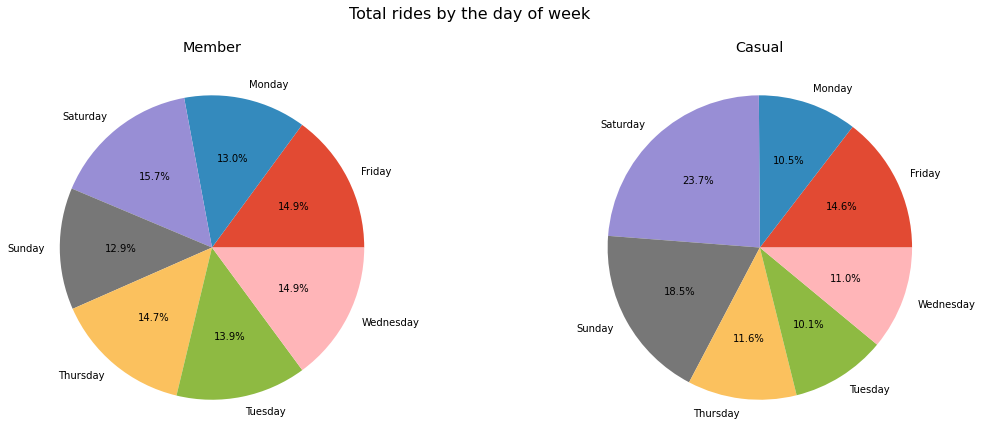

In [31]:
mem = df["day"][df["member_casual"]=="member"].value_counts().sort_index()
cas = df["day"][df["member_casual"]=="casual"].value_counts().sort_index()
days = ["Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.pie(mem, labels = days, autopct='%1.1f%%')
ax2.pie(cas, labels = days, autopct='%1.1f%%')

ax1.set(title = "Member")
ax2.set(title = "Casual")

plt.suptitle("Total rides by the day of week", fontsize = 16)
;

### Mean ride duration by the day of week

''

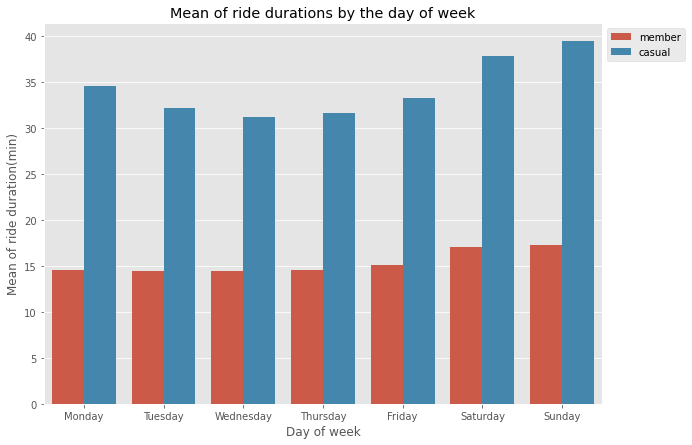

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))

plt.ticklabel_format(style='plain')

sns.barplot(
    y = "ride_duration_min", 
    x = "day", 
    data = df, 
    ci = None, 
    hue = "member_casual",
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    estimator = np.mean)

ax.set(title = "Mean of ride durations by the day of week", 
      xlabel = "Day of week", 
      ylabel = "Mean of ride duration(min)")

plt.legend(bbox_to_anchor=(1,1))

;

### Visualization of rides by month by user type

''

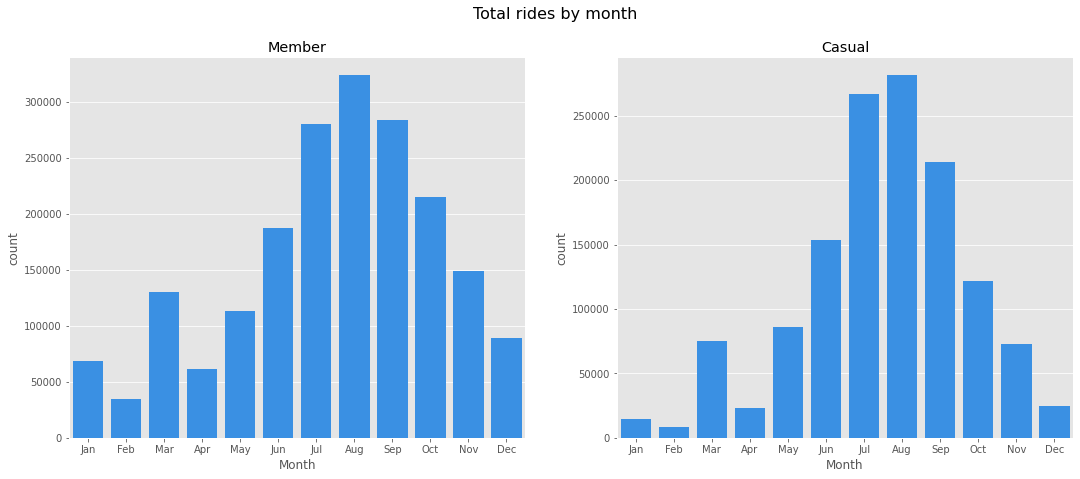

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

sns.countplot(x = df["month"][df["member_casual"] == "member"],
              data = df, 
              ax = ax1, 
              color = "dodgerblue",
              order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

sns.countplot(x = df["month"][df["member_casual"] == "casual"],
              data = df,  
              ax = ax2,
              color = "dodgerblue",
              order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

ax1.set(title = "Member", xlabel = "Month")
ax2.set(title = "Casual", xlabel = "Month")

plt.suptitle("Total rides by month", fontsize=16)
;

### Ride duration by the month

''

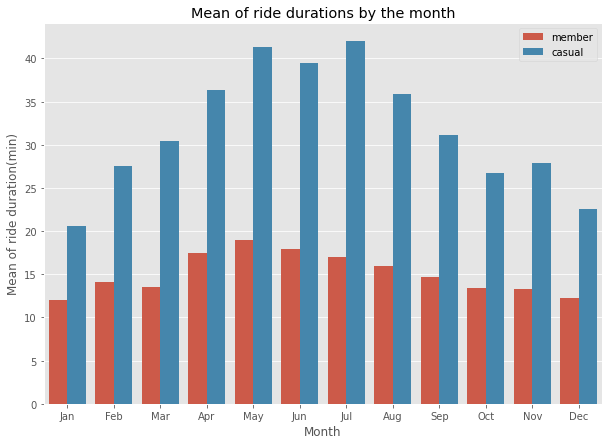

In [34]:
fig, ax = plt.subplots(figsize=(10, 7))

plt.ticklabel_format(style='plain')

sns.barplot(
    y = "ride_duration_min", 
    x = "month", 
    data = df, 
    ci = None, 
    hue = "member_casual",
    estimator = np.mean,
    order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

ax.set(title = "Mean of ride durations by the month", 
      xlabel = "Month", 
      ylabel = "Mean of ride duration(min)")

plt.legend()

;

## Bike type visualization

''

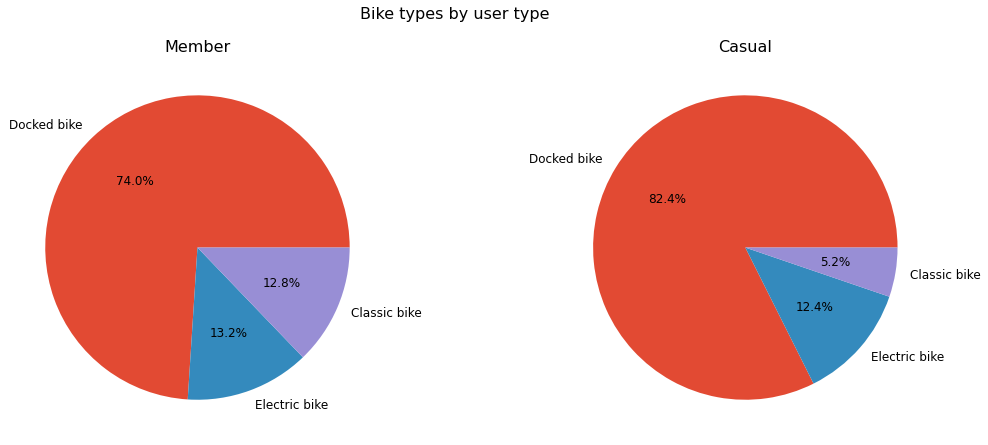

In [35]:
mem = df["rideable_type"][df["member_casual"]=="member"].value_counts()
cas = df["rideable_type"][df["member_casual"]=="casual"].value_counts()
types = ["Docked bike", "Electric bike", "Classic bike"]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.pie(mem, labels = types, autopct='%1.1f%%', textprops={'fontsize': 12})
ax2.pie(cas, labels = types, autopct='%1.1f%%', textprops={'fontsize': 12})


ax1.set_title("Member", fontsize = 16)
ax2.set_title("Casual", fontsize = 16)

plt.suptitle("Bike types by user type", fontsize = 16)
;

# Wrap up

Through this project I managed to get some insights into data regarding the differences between bike usage of member and casual riders. I changed data types, created new varibales, checked for duplicated and missing data, removed data and finally did the data visualization.

From the analysis of this dataset we can conclude following:

* approximately 3/5 of riders are members, 2/5 are casual
* most rides happen aftenoon around the end of worktime (15-18)
* member riders ride bikes consistently through the whole week, while the casual riders ride bikes with increase on friday and weekend
* we can say that the average ride duration is consistent through every day of week, both for members and casual riders
* ride duration of casual riders is more then two times longer then ride duration of member riders through every day of week
* most bike rides happen in months with good weather (Jun-Oct), for both member and casual riders
* average ride duration for casual riders is almost two times longer in months with good weather (Jan-20 min: Jul-40+ min), while there is no bigger difference for the member riders
* 80% of rides are made with docked bike. Member riders use slightly more classic bikes then casual riders